<a href="https://colab.research.google.com/github/1MedvedevV/M_AI/blob/main/DatasetKorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исходные данные:
                                        Name     Mileage  Rating Review Count  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  29,636 mi.     3.9       1,800    
1          2022 Mercedes-Benz AMG SL 63 Base   5,540 mi.     4.7       1,239    
2          2022 Mercedes-Benz AMG SL 63 Base   4,890 mi.     4.7       1,239    
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  29,746 mi.     4.8         752    
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC  32,631 mi.     5.0       1,502    

      Price  
0   $30,900  
1  $139,999  
2  $132,999  
3   $58,587  
4   $95,990  

Преобразованные данные:
                                        Name  Year  Mileage  Rating  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  2021  29636.0     3.9   
1          2022 Mercedes-Benz AMG SL 63 Base  2022   5540.0     4.7   
2          2022 Mercedes-Benz AMG SL 63 Base  2022   4890.0     4.7   
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  2020  29746.0     4.8   
4  2021 Mercedes-Benz AMG GLS 63

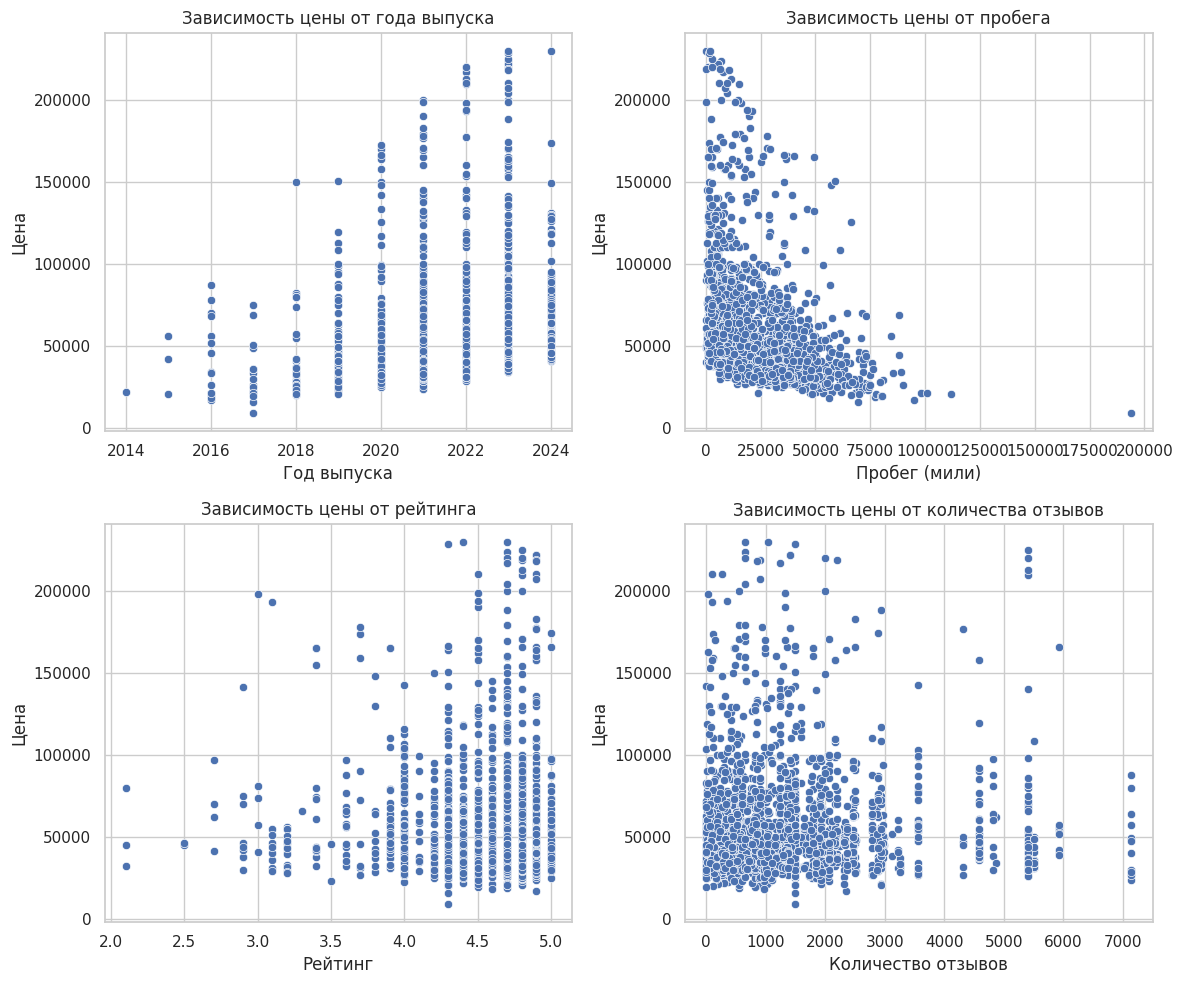

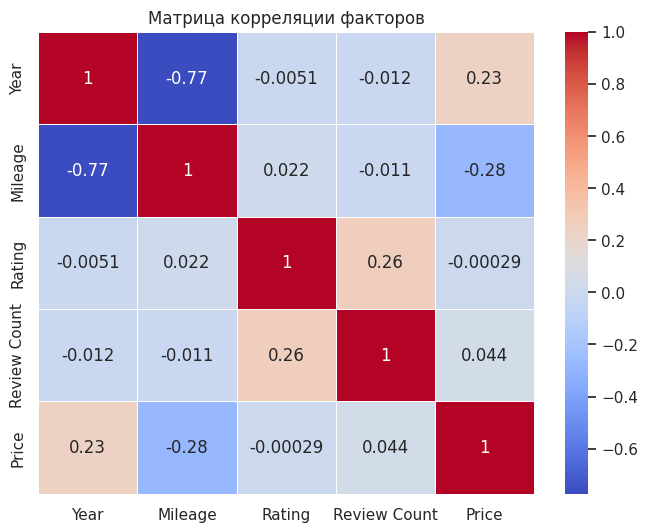

In [11]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета с GitHub
url = "https://raw.githubusercontent.com/1MedvedevV/M_AI/refs/heads/main/usa_mercedes_benz_prices.csv"
df = pd.read_csv(url)

# Выводим первые 5 строк исходного датасета
print("Исходные данные:")
print(df.head())

# Очистка данных и преобразование столбцов

# Удаление строк с отсутствующими значениями
df = df[df['Price'] != 'Not Priced']

# Преобразование столбцов 'Price', 'Mileage', 'Rating', 'Review Count' в числа
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Mileage'] = df['Mileage'].replace({',': '', ' mi.': ''}, regex=True).astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Review Count'] = df['Review Count'].replace({',': ''}, regex=True).astype(float)

# Разделение года выпуска автомобиля в отдельную колонку 'Year'
df['Year'] = df['Name'].str.extract(r'(\d{4})').astype(int)

# Удаляем символы пробелов в столбце 'Name'
df['Name'] = df['Name'].str.strip()

# Вывод преобразованных данных
print("\nПреобразованные данные:")
print(df[['Name', 'Year', 'Mileage', 'Rating', 'Review Count', 'Price']].head())

# Визуализация зависимостей

# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с матрицей 2x2 для размещения графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 строки, 2 столбца, размер всей фигуры

# График 1: Зависимость цены от года выпуска
sns.scatterplot(x='Year', y='Price', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Зависимость цены от года выпуска')
axs[0, 0].set_xlabel('Год выпуска')
axs[0, 0].set_ylabel('Цена')

# График 2: Зависимость цены от пробега
sns.scatterplot(x='Mileage', y='Price', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Зависимость цены от пробега')
axs[0, 1].set_xlabel('Пробег (мили)')
axs[0, 1].set_ylabel('Цена')

# График 3: Зависимость цены от рейтинга
sns.scatterplot(x='Rating', y='Price', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Зависимость цены от рейтинга')
axs[1, 0].set_xlabel('Рейтинг')
axs[1, 0].set_ylabel('Цена')

# График 4: Зависимость цены от количества отзывов
sns.scatterplot(x='Review Count', y='Price', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Зависимость цены от количества отзывов')
axs[1, 1].set_xlabel('Количество отзывов')
axs[1, 1].set_ylabel('Цена')

# Увеличиваем расстояние между графиками для лучшего отображения
plt.tight_layout()

# Показываем все графики
plt.show()

# Визуализация матрицы корреляции

# Рассчитываем корреляцию между числовыми переменными
corr_matrix = df[['Year', 'Mileage', 'Rating', 'Review Count', 'Price']].corr()

# Создание тепловой карты корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции факторов')
plt.show()
